In [85]:
library(ggplot2)

In [86]:
# df0 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv")
# df0 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_BH.csv", row.names = 1)
df0 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv", row.names = 1)
head(df0,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [87]:
# df0$label = c()
# df0$label = as.character(df0$new_label)
# df0$new_label = c()

In [88]:
# df0$label[df0$label == 'DA_ROT_D52'] = 'DA_D52_ROT'
# df0$label[df0$label == 'Sert_ROT_D52'] = 'Sert_D52_ROT'
# df0$label[df0$label == 'Epen1_ROT_D52'] = 'Epen1_D52_ROT'
# df0$label[df0$label == 'Astro_ROT_D52'] = 'Astro_D52_ROT'

In [89]:
unique(df0$label)

[1] FPP_D11       P_FPP_D11     FPP_D30       DA_D30        Sert_D30     
 [6] Epen1_D30     DA_D52        Sert_D52      Epen1_D52     Astro_D52    
[11] DA_D52_ROT    Sert_D52_ROT  Epen1_D52_ROT Astro_D52_ROT
14 Levels: Astro_D52 Astro_D52_ROT DA_D30 DA_D52 DA_D52_ROT ... Sert_D52_ROT

In [90]:
# write.csv(df0,"/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv", quote = F, row.names = F)
# head(df0,2)

In [91]:
df1 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/results_no_ncell_noisematrix_5pct_FDR.csv")
head(df1)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,q_value,label
19_54613420_G_A,4.830075e-07,-0.1979300,0.03932688,8.186864e-03,19,54618837,54635140,173,173,...,19,54613420,A,1,0.20231214,0.3501197,ENSG00000105618,8.176940e-02,4.559045e-02,FPP_D11
19_54612628_A_G,3.805426e-09,-0.1845487,0.03131959,1.476142e-04,19,54606036,54612564,173,173,...,19,54612628,G,1,0.25433526,0.6931531,ENSG00000170906,2.946154e-03,1.642625e-03,FPP_D11
12_48401919_G_A,1.717016e-07,-0.3119142,0.05966653,3.314304e-03,12,48366748,48398269,173,173,...,12,48401919,A,1,0.17630058,0.1873425,ENSG00000139219,3.970281e-02,2.213627e-02,FPP_D11
12_49272647_T_C,6.372913e-06,0.6360799,0.14092443,7.714025e-03,12,49297893,49325623,173,173,...,12,49272647,C,1,0.09248555,0.3665383,ENSG00000139537,7.767524e-02,4.330776e-02,FPP_D11
2_85616758_T_C,2.518656e-06,0.3741811,0.07950113,8.749724e-03,2,85621871,85645555,173,173,...,2,85616758,C,1,0.23988439,0.2969735,ENSG00000042493,8.622069e-02,4.807227e-02,FPP_D11
10_5865257_T_C,3.104454e-13,-0.1513292,0.02075907,1.380638e-06,10,5807186,5884095,173,173,...,10,5865257,C,1,0.22543353,1.0000000,ENSG00000057608,4.491001e-05,2.503954e-05,FPP_D11


In [92]:
# df1 = df1[df1$global_corr_p_value < 0.05,]

In [93]:
df = data.frame()
labels = unique(df1$label)
for (label in labels){
    n1 = nrow(df1[df1$label == label,])
    n2 = nrow(df0[df0$label == label,])
    df = rbind(df, data.frame(label = label, egenes = n1, model = 'base_model'),
                   data.frame(label = label, egenes = n2, model = 'ncell_model'))
}

In [94]:
head(df)

label,egenes,model
FPP_D11,1187,base_model
FPP_D11,2560,ncell_model
P_FPP_D11,1491,base_model
P_FPP_D11,2457,ncell_model
FPP_D30,406,base_model
FPP_D30,881,ncell_model


In [95]:
df[df$model == 'ncell_model',]

,label,egenes,model
2,FPP_D11,2560,ncell_model
4,P_FPP_D11,2457,ncell_model
6,FPP_D30,881,ncell_model
8,DA_D30,872,ncell_model
10,Sert_D30,776,ncell_model
12,Epen1_D30,1011,ncell_model
14,DA_D52,1024,ncell_model
16,Sert_D52,1436,ncell_model
18,Epen1_D52,1391,ncell_model
20,Astro_D52,257,ncell_model


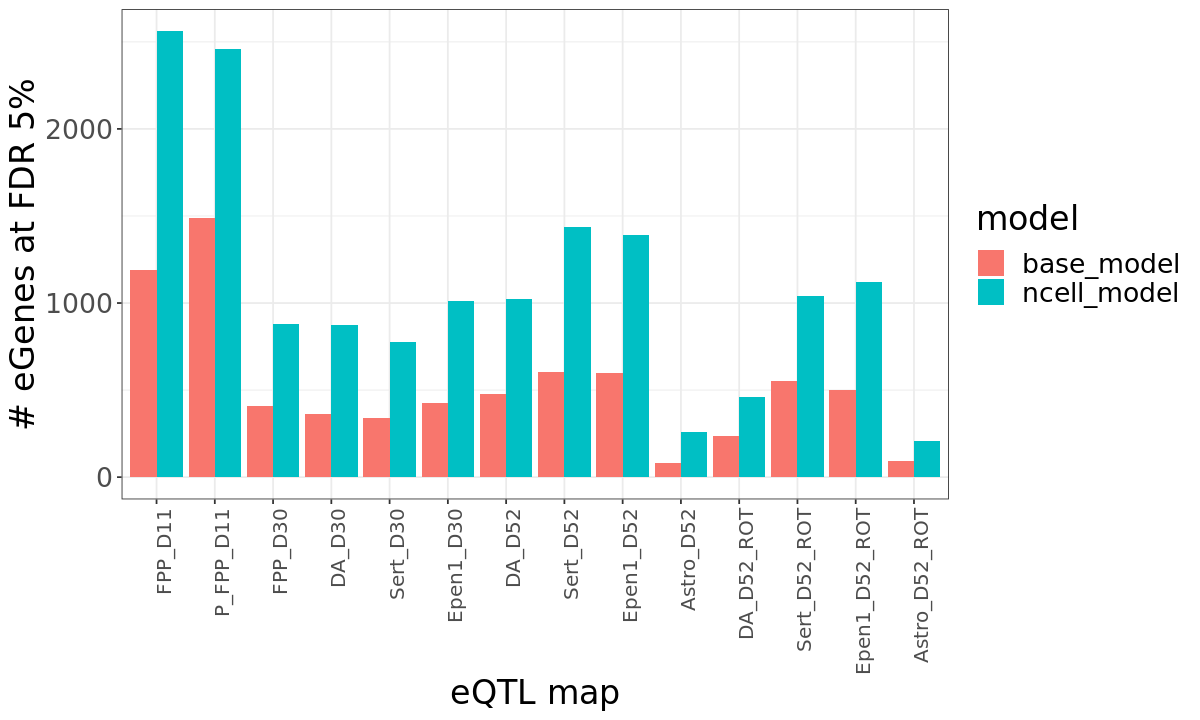

In [96]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(df, aes(x = label, y = egenes, fill = model)) + 
    geom_bar(stat = "identity", position = 'dodge') + 
    ylab("# eGenes at FDR 5%") + xlab("eQTL map") + theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12), text = element_text(size=20))